# Projekt 1 
### P. Fijałkowski, M. Krzyziński, T. Nocoń

## Eksploracja danych

#### Wczytanie pakietów

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Wstępne informacje i wczytanie danych
W projekcie będziemy pracować nad zbiorem danym *Census income* zawierającym informacje pochodzące ze spisu ludności Amerykanów. Celem zadania będzie klasyfikacja, czy zarobki danej osoby przekroczą próg 50 tys. $ rocznie. 

Informacje dotyczące zbioru, jak i same dane możemy znaleźć na [stronie](https://www.apispreadsheets.com/datasets/106).

In [11]:
df = pd.read_csv("https://lovespreadsheet-tutorials.s3.amazonaws.com/APIDatasets/census_income_dataset.csv")

In [12]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419.0,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
48838,64,?,321403.0,HS-grad,9,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K
48839,38,Private,374983.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
48840,44,Private,83891.0,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


In [4]:
df.shape

(48842, 15)

Już na wstępie możemy zauważyć, że mamy 15 kolumn, spośród których jedna będzie targetem - `income_level` zawierająca informacje odnośnie przekroczenia lub nieprzekroczenia progu zarobkowego 50 tys. dolarów.

Ponadto nawet wyświetlając ramkę ten sposób widzimy w niektórych kolumnach znaki zapytania `?`. Również na stronie, z której pobieramy zbiór znajdziemy informacje, że brakujące wartości zostały wypełnione znakami zapytania `?` bądź wartością `-100000`. Będziemy musieli się uporać zatem z problemem brakujących danych. Ale sprawdźmy dla zasady, czy może niektóre wartości w ramce rzeczywiście pozostały `NULL`ami...

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education_num   48842 non-null  int64  
 5   marital_status  48842 non-null  object 
 6   occupation      48842 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital_gain    48842 non-null  float64
 11  capital_loss    48842 non-null  float64
 12  hours_per_week  48842 non-null  float64
 13  native_country  48842 non-null  object 
 14  income_level    48842 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 5.6+ MB


Okazuje się, że nie. Zatem rzeczywiście wszystkie ewentualne brakujące wartości zostały zastąpione w określony wyżej sposób. 

Przy okazji widzimy również, jakiego typu są nasze kolumny. 

Sprawdźmy teraz, jak dużo mamy braków w rzeczywistości (tych zatuszowanych). 

In [13]:
df[(df == "?").any(axis = 1)]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
14,40,Private,121772.0,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,?,>50K
27,54,?,180211.0,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0.0,0.0,60.0,South,>50K
38,31,Private,84154.0,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,38.0,?,>50K
51,18,Private,226956.0,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0.0,0.0,30.0,?,<=50K
61,32,?,293936.0,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0.0,0.0,40.0,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48769,21,?,212661.0,Some-college,10,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
48800,73,?,144872.0,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0.0,0.0,25.0,Canada,<=50K
48812,81,?,26711.0,Assoc-voc,11,Married-civ-spouse,?,Husband,White,Male,2936.0,0.0,20.0,United-States,<=50K
48826,50,Local-gov,139347.0,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0.0,0.0,40.0,?,>50K


In [17]:
df[(df == -100000).any(axis = 1)]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level


In [18]:
3620/48842

0.07411653904426518

Okazuje się, że aż 3620 wierszy zawiera `?` w przynajmniej jednej kolumnie, ale w rzeczywistości nie mamy żadnej wartości uzupełnionej `-100 000`. 

In [9]:
df[df == "?"] = np.nan

In [8]:
df[(df == -100000).any(axis = 1)]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       46043 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education_num   48842 non-null  int64  
 5   marital_status  48842 non-null  object 
 6   occupation      46033 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital_gain    48842 non-null  float64
 11  capital_loss    48842 non-null  float64
 12  hours_per_week  48842 non-null  float64
 13  native_country  47985 non-null  object 
 14  income_level    48842 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 5.6+ MB


In [10]:
df.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income_level         0
dtype: int64

In [43]:
df = df.dropna()

In [44]:
df.shape

(45222, 15)

In [16]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


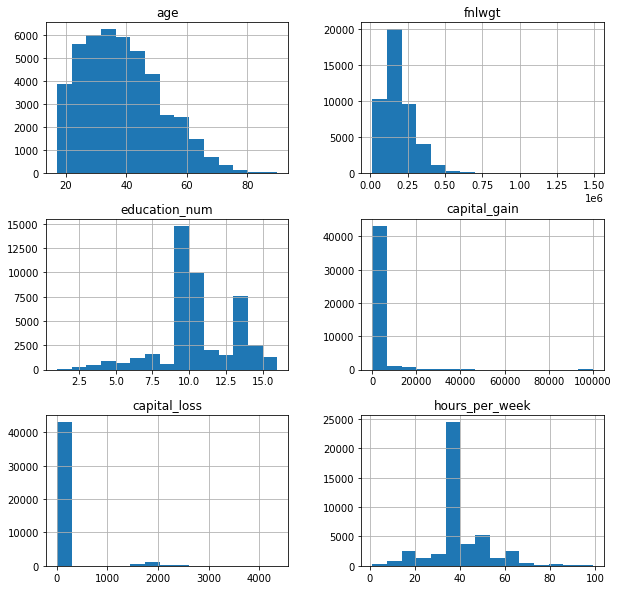

In [22]:
df.hist(bins = 15, figsize=(10, 10))
plt.show()

In [45]:
df.loc[:,"income_level"] = df.loc[:,"income_level"].map({'<=50K': 0, '>50K': 1})

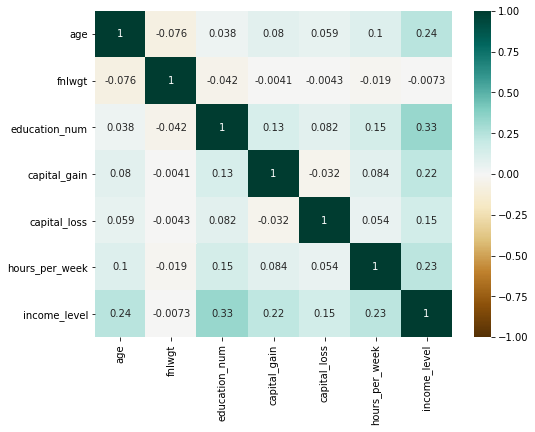

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="BrBG")
plt.show()

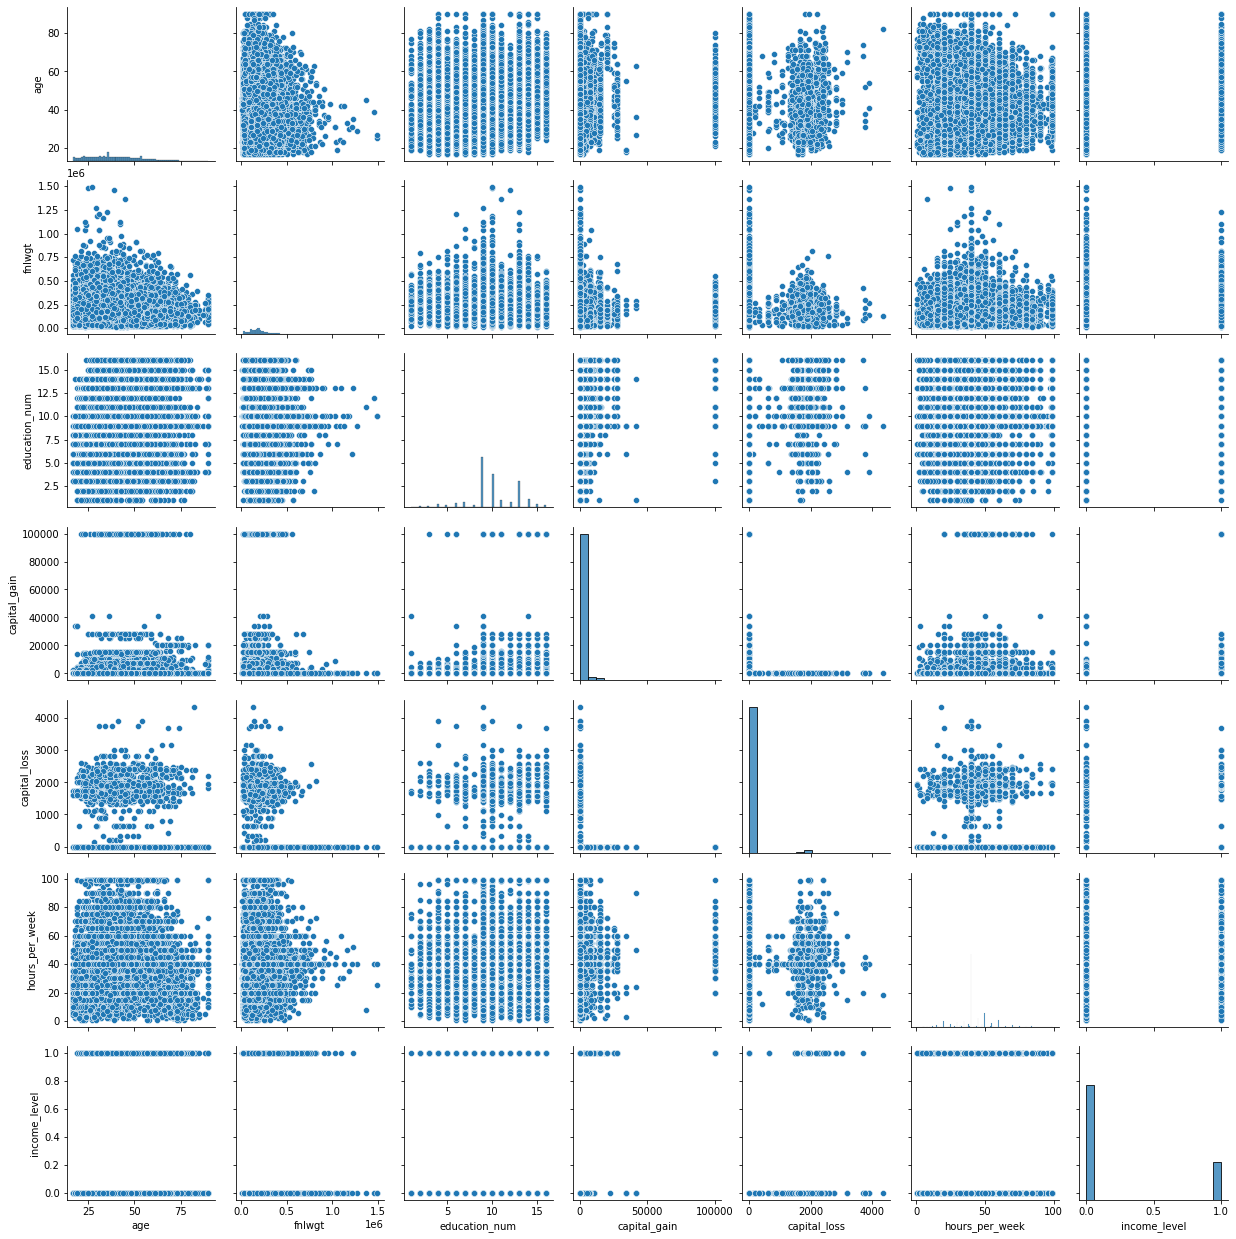

In [51]:
sns.pairplot(df)
plt.show()

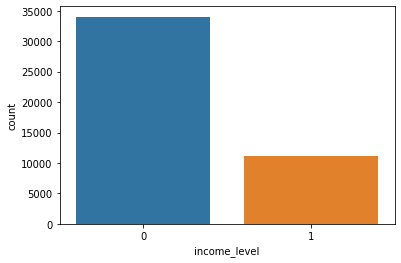

In [49]:
sns.countplot(data = df, x = "income_level", label="count")
plt.show()

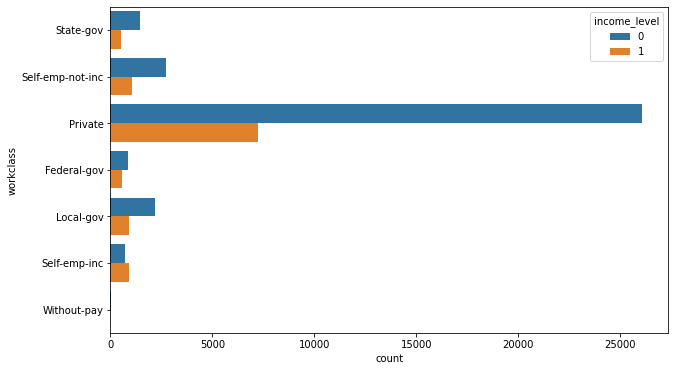

In [50]:
plt.figure(figsize = (10, 6))
sns.countplot(data = df, y = "workclass", hue = "income_level")
plt.show()

In [68]:
# kolumny education_num i education oznaczają to samo
for i in range(1, max(df["education_num"])+1):
    print(i, df[df["education_num"] == i]["education"].unique())
    if len(df[df["education_num"] == i]["education"].unique()) != 1:
        print(i)

1 ['Preschool']
2 ['1st-4th']
3 ['5th-6th']
4 ['7th-8th']
5 ['9th']
6 ['10th']
7 ['11th']
8 ['12th']
9 ['HS-grad']
10 ['Some-college']
11 ['Assoc-voc']
12 ['Assoc-acdm']
13 ['Bachelors']
14 ['Masters']
15 ['Prof-school']
16 ['Doctorate']


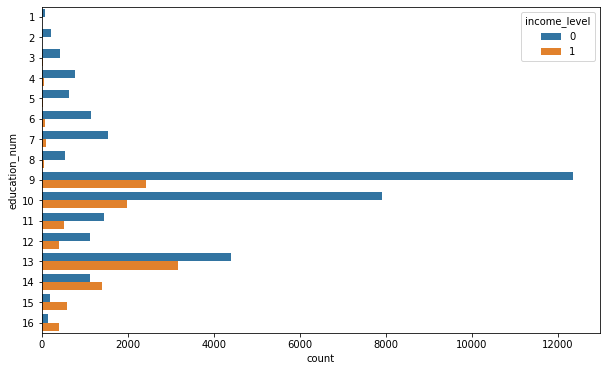

In [69]:
plt.figure(figsize = (10, 6))
sns.countplot(data = df, y = "education_num", hue = "income_level")
plt.show()

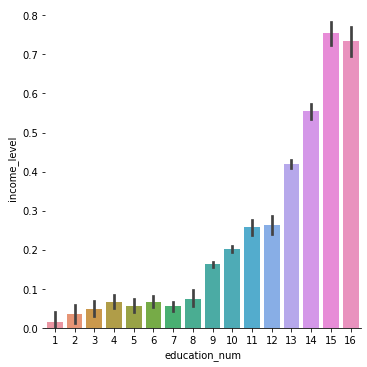

In [88]:
ax = sns.catplot(x="education_num", y="income_level", data=df, kind="bar", ci=95)
ax.despine(left = True)
plt.show()

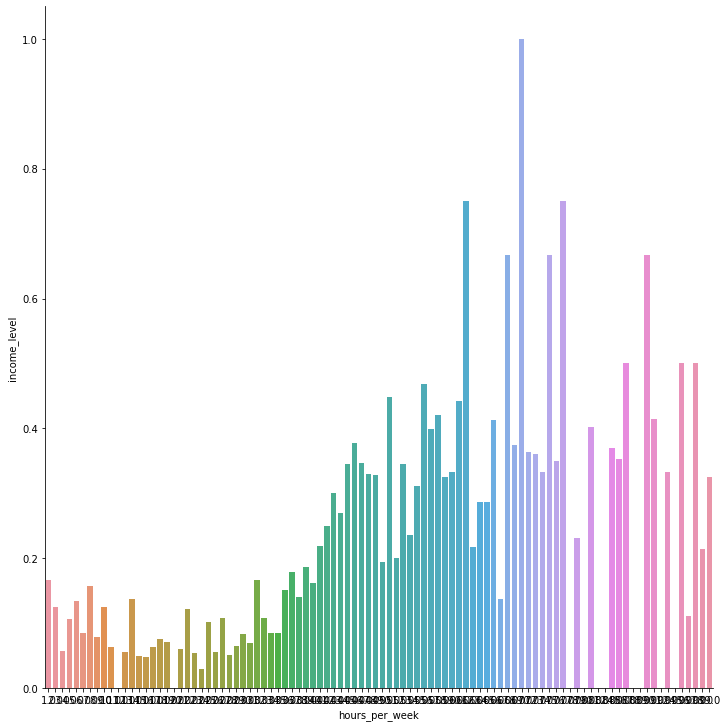

In [96]:
sns.catplot(x="hours_per_week", y="income_level", data=df, kind="bar", ci=None, height = 10)
plt.show()

In [115]:
df.groupby(pd.cut(df['hours_per_week'], bins=[0, 20, 39, 40, 50, 60, 80, 100]))["income_level"].mean()

hours_per_week
(0, 20]      0.063576
(20, 39]     0.114880
(39, 40]     0.218419
(40, 50]     0.398088
(50, 60]     0.435770
(60, 80]     0.373550
(80, 100]    0.331081
Name: income_level, dtype: float64

In [116]:
df.groupby(pd.cut(df['hours_per_week'], bins=[0, 20, 39, 40, 50, 60, 80, 100]))["income_level"].size()

hours_per_week
(0, 20]       3602
(20, 39]      6485
(39, 40]     21358
(40, 50]      8576
(50, 60]      3612
(60, 80]      1293
(80, 100]      296
Name: income_level, dtype: int64

In [123]:
pd.qcut(df['hours_per_week'], q = [0, 0.2, 0.4, 0.6, 0.8, 1], duplicates = "drop").value_counts()

(36.0, 40.0]     22337
(0.999, 36.0]     9108
(40.0, 50.0]      8576
(50.0, 99.0]      5201
Name: hours_per_week, dtype: int64

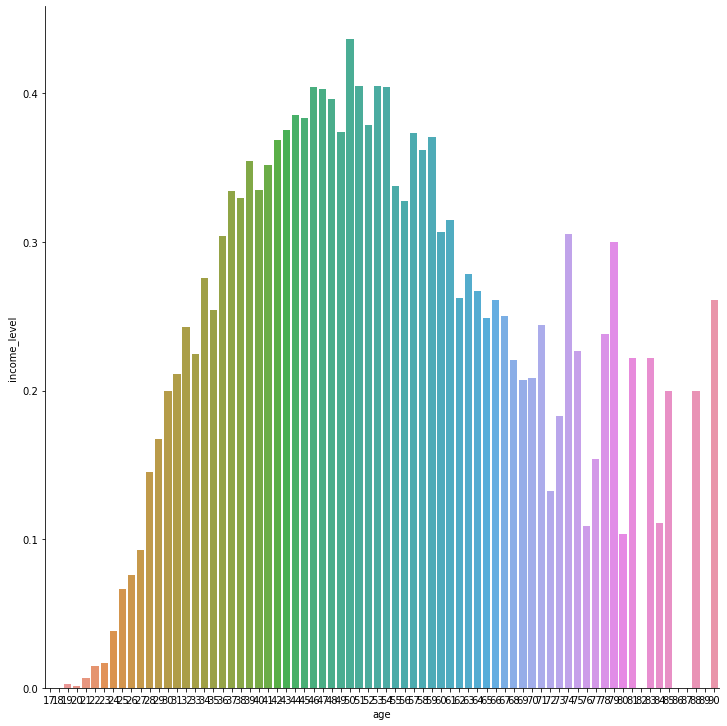

In [117]:
sns.catplot(x="age", y="income_level", data=df, kind="bar", ci=None, height = 10)
plt.show()

In [124]:
pd.qcut(df['age'], q = [0, 0.2, 0.4, 0.6, 0.8, 1], duplicates = "drop").value_counts()

(26.0, 34.0]      9710
(16.999, 26.0]    9533
(41.0, 50.0]      8816
(50.0, 90.0]      8681
(34.0, 41.0]      8482
Name: age, dtype: int64

In [125]:
pd.cut(df['age'], bins = [17, 27, 37, 47, 90]).value_counts()

(27, 37]    12337
(47, 90]    11135
(37, 47]    11060
(17, 27]    10197
Name: age, dtype: int64

In [127]:
df.groupby(pd.cut(df['age'], bins = [17, 27, 37, 47, 90]))["income_level"].mean()

age
(17, 27]    0.034618
(27, 37]    0.236767
(37, 47]    0.367722
(47, 90]    0.347283
Name: income_level, dtype: float64

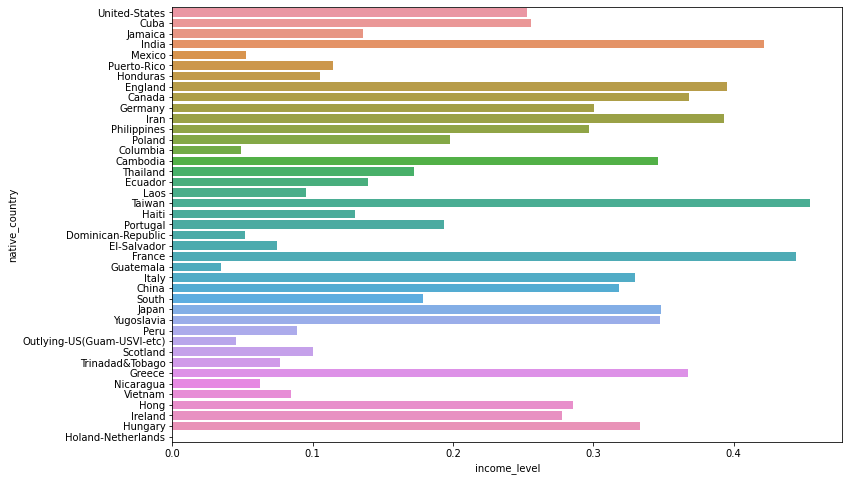

In [145]:
plt.figure(figsize = (12, 8))
sns.barplot(y = "native_country", x = "income_level", data = df, estimator=np.mean, ci = None)
plt.show()

In [138]:
df["native_country"].value_counts()

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [142]:
df.loc[df["native_country"] == "United-States", "income_level"].mean()

0.25302722076915624

In [143]:
df.loc[df["native_country"] != "United-States", "income_level"].mean()

0.19338422391857507

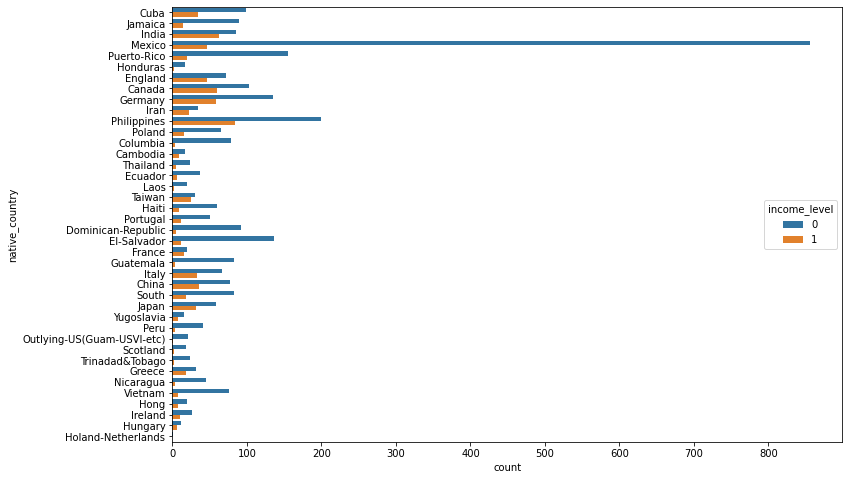

In [153]:
plt.figure(figsize = (12, 8))
sns.countplot(y = "native_country", hue = "income_level", data = df[df["native_country"] != "United-States"])
plt.show()

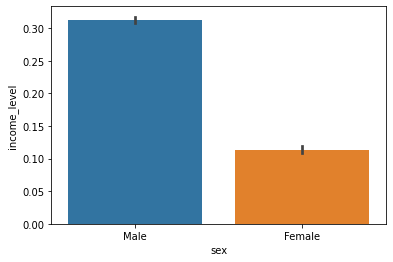

In [156]:
sns.barplot(x="sex",y="income_level",data=df)
plt.show()

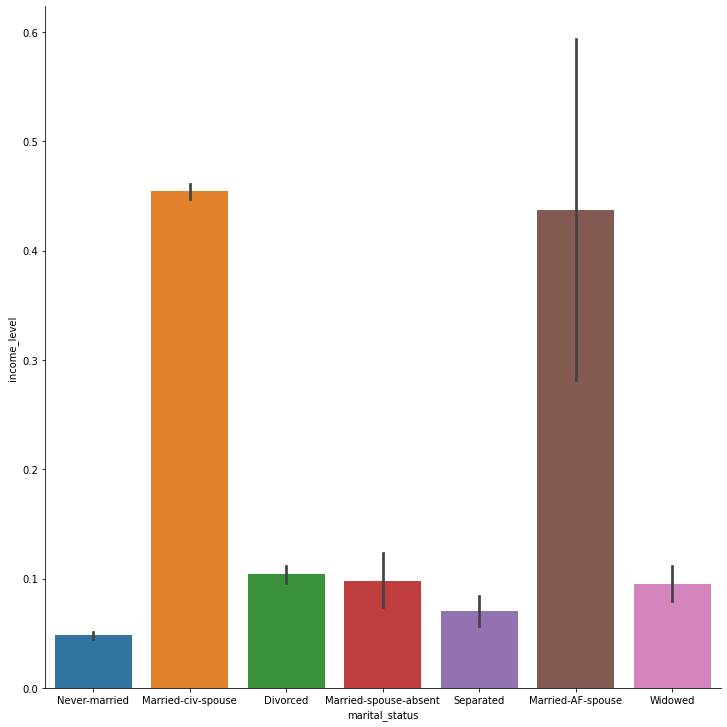

In [157]:
sns.catplot(x="marital_status",y="income_level",data=df,kind="bar",height=10)

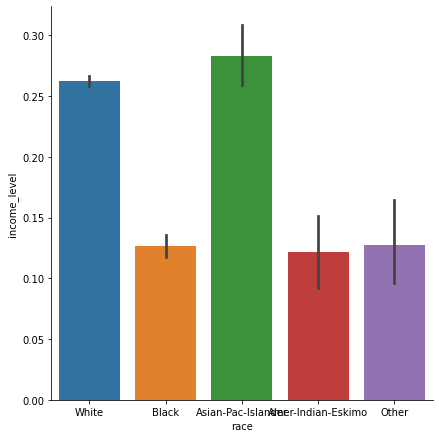

In [159]:
sns.catplot(x="race",y="income_level",data=df,kind="bar",height=6)